# Support Vector Machine

## import libraries

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Read Csv File 

In [104]:
social_n=pd.read_csv("Social_Network_Ads.csv")

In [105]:
social_n

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [106]:
x = social_n.iloc[:, :-1].values

y = social_n.iloc[:, -1].values


# Splitting the Dataset into Training set and test set

In [92]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x,y, test_size=0.25, random_state = 0)

# Feature Scaling

In [93]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Training the Svm Model on Training Set

In [94]:
from sklearn.svm import SVC
classifier = SVC(kernel="linear", random_state =0)
classifier.fit(x_train, y_train);

# Predicting New Result

In [95]:
print(classifier.predict(sc.transform([[26,50000]])))

[0]


# Predicting Test Set Results

In [96]:
y_pred = classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]]


# Confusion Matrix

the accuracy score is  0.9


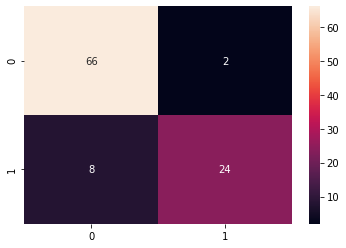

In [109]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print("the accuracy score is " , accuracy_score(y_test, y_pred))
sns.heatmap(cm, annot=True);

# visualization of SVM

In [98]:
w = classifier.coef_[0]
print(w)

[1.60291291 0.97138722]


In [99]:
xx = [x_train.min(),x_train.max()]

In [100]:
b = classifier.intercept_

In [101]:
#PLooting y-axis of hyper plane
yy = [(-w[0] * xx[0] - b) / w[1], (-w[0] * xx[1] - b) / w[1]]
yy_plus1 =  [(-w[0] * xx[0] - b +1) / w[1], (-w[0] * xx[1] - b +1) / w[1]] #for Positive class support vector
yy_minus1 =  [(-w[0] * xx[0] - b -1) / w[1], (-w[0] * xx[1] - b -1) / w[1]] #For negative class support vector
print(yy)
print(yy_plus1)
print(yy_minus1)

[array([4.08027842]), array([-3.05606353])]
[array([5.10973401]), array([-2.02660794])]
[array([3.05082284]), array([-4.08551911])]


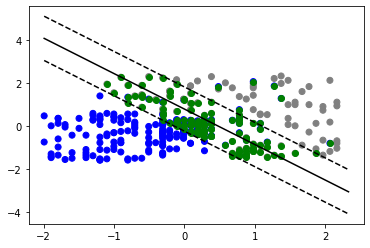

In [102]:
import matplotlib.pyplot as plt

h  = plt.plot(xx,yy, 'k')
plus1 = plt.plot(xx,yy_plus1, 'k--')
minus1 = plt.plot(xx,yy_minus1, 'k--')
a = classifier.support_vectors_[:,0]
b = classifier.support_vectors_[:,1]

color = ['blue' if c == 0 else 'gray' for c in y_train]
plt.scatter(x_train[:,0],x_train[:,1], c = color)
plt.scatter(a,b, c= "g") #Green color shows support Vectors
plt.show()